<h1><center><u>Final Year Project</u></h1></center>
<center>Model Training Notebook</center>


### Name     - Sanket Madan Bairagi
### College Name - B. K. Birla College kalyan.
### Students ID - 45164      
### Class - M.Sc. In Data Science And Big Data Analytics     
### Semester - 4 (Part - II)   
### Project Name - Heart Disease Prediction
### Datset Link - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [1]:
# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SanketBairagi/FinalPro/main/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# data Processing and onehot coding and Feature Engineering

In [4]:
df=df[df["SleepTime"] <11] 

In [5]:
df=df[df["SleepTime"]>4]

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,305095.000000,305095.000000,305095.000000,305095.000000
mean,28.263328,3.079998,3.621089,7.157272
std,6.277987,7.561576,7.590524,1.098027
min,12.020000,0.000000,0.000000,5.000000
25%,24.020000,0.000000,0.000000,6.000000
50%,27.290000,0.000000,0.000000,7.000000
75%,31.320000,1.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,10.000000


In [7]:
df.shape

(305095, 18)

In [8]:
cols_yes__no_values = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity',
                       'Asthma', 'KidneyDisease', 'SkinCancer']
yes__no_values = {'No':0, 'Yes':1}
for i in range(0, len(cols_yes__no_values)):
    df[cols_yes__no_values[i]] = df[cols_yes__no_values[i]].replace(yes__no_values)

In [9]:
sex = {'Female':0, 'Male':1}
df['Sex'] = df['Sex'].replace(sex)

ageCategory= {'18-24':0, '25-29':1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8,
             '65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df['AgeCategory'] = df['AgeCategory'].replace(ageCategory)

genHealth = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
df['GenHealth'] = df['GenHealth'].replace(genHealth)

diabetic = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
df['Diabetic'] = df['Diabetic'].replace(diabetic)

In [10]:
data=df

In [11]:
data["BMICAT"]= data.apply(lambda x:"under weight" if x["BMI"]<18.5 else x["BMI"],axis=1)


In [12]:
data["BMICAT"]= data.apply(lambda x:"Noraml weight" if 18.5<=x["BMI"]<25.0 else x["BMICAT"],axis=1)

In [13]:
data["BMICAT"]= data.apply(lambda x:"over weight" if 25.0<=x["BMI"]<30.0 else x["BMICAT"],axis=1)

In [14]:
data["BMICAT"]= data.apply(lambda x:"obese" if x["BMI"]>=30.0 else x["BMICAT"],axis=1)

In [15]:
bmicat = {'under weight':0, 'Noraml weight':1, 'over weight':2, 'obese':3}
data['BMICAT'] = data['BMICAT'].replace(bmicat)

In [16]:
# deleting unnecessary columns 

In [17]:
data=data.drop("BMI",axis=1)

In [18]:
data=data.drop("Race",axis=1)

In [19]:
data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
0,0,1,0,0,3.0,30.0,0,0,7,3,1,3,5.0,1,0,1,0
1,0,0,0,1,0.0,0.0,0,0,12,0,1,3,7.0,0,0,0,1
2,0,1,0,0,20.0,30.0,0,1,9,3,1,1,8.0,1,0,0,2
3,0,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1,1
4,0,0,0,0,28.0,0.0,1,0,4,0,1,3,8.0,0,0,0,1


In [20]:
data.shape

(305095, 17)

In [22]:
X = data.loc[:,data.columns != 'HeartDisease']
X.head()

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
0,1,0,0,3.0,30.0,0,0,7,3,1,3,5.0,1,0,1,0
1,0,0,1,0.0,0.0,0,0,12,0,1,3,7.0,0,0,0,1
2,1,0,0,20.0,30.0,0,1,9,3,1,1,8.0,1,0,0,2
3,0,0,0,0.0,0.0,0,0,11,0,0,2,6.0,0,0,1,1
4,0,0,0,28.0,0.0,1,0,4,0,1,3,8.0,0,0,0,1


In [112]:
X.describe()

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
count,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000,560188.000000
mean,0.384919,0.037896,0.031088,4.858875,3.619772,0.143097,0.442703,7.668593,0.606152,0.647467,2.134944,7.192453,0.086003,0.027528,0.072185,1.916369
std,0.486577,0.190945,0.173555,9.510025,7.755592,0.350172,0.496707,3.241056,1.134487,0.477759,1.125881,1.063149,0.280369,0.163617,0.258794,0.784897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,6.298870,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,0.000000,3.509144,2.339668,0.000000,1.000000,10.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,3.000000,1.000000,4.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [23]:
y = data.HeartDisease
y

0         0
1         0
2         0
3         0
4         0
         ..
319789    0
319790    1
319791    0
319792    0
319794    0
Name: HeartDisease, Length: 305095, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)

Before-
 0    280094
1     25001
Name: HeartDisease, dtype: int64
Before-
 0    280094
1    280094
Name: HeartDisease, dtype: int64


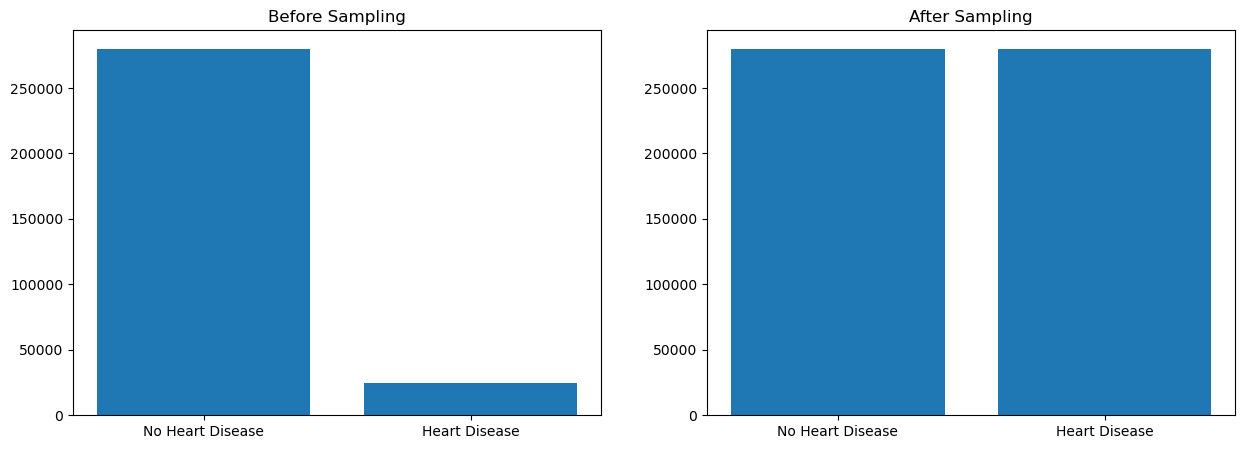

In [111]:



plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Before Sampling')
ax= plt.bar(x=["No Heart Disease","Heart Disease"],height=data["HeartDisease"].value_counts())

plt.subplot(1,2,2)
plt.title('After Sampling')
plt.bar(x=["No Heart Disease","Heart Disease"],height=y.value_counts())

plt.show()


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((448150, 16), (112038, 16), (448150,), (112038,))

In [62]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train[["PhysicalHealth","MentalHealth","AgeCategory","Diabetic","GenHealth","SleepTime","BMICAT"]] = mms.fit_transform(X_train[["PhysicalHealth","MentalHealth","AgeCategory","Diabetic","GenHealth","SleepTime","BMICAT"]])
X_test[["PhysicalHealth","MentalHealth","AgeCategory","Diabetic","GenHealth","SleepTime","BMICAT"]] = mms.transform(X_test[["PhysicalHealth","MentalHealth","AgeCategory","Diabetic","GenHealth","SleepTime","BMICAT"]])

In [64]:
X_train.head()

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
243987,1,0,0,0.000000,0.000000,0,0,0.666667,0.0,1,0.50,0.2,0,0,0,0.666667
146382,0,0,0,0.000000,0.000000,1,0,0.833333,0.0,0,0.50,0.0,0,0,0,1.000000
209288,0,1,0,1.000000,0.166667,0,0,0.500000,0.0,1,0.50,0.4,0,0,0,0.666667
163385,1,0,0,0.500000,0.500000,0,0,0.416667,1.0,1,0.25,0.6,0,0,0,0.333333
195949,1,0,0,0.166667,0.100000,0,0,0.750000,0.0,1,0.50,0.4,0,0,1,0.333333


In [65]:
X_train.describe()

,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICAT
count,448150.000000,448150.000000,448150.000000,448150.000000,448150.000000,448150.000000,448150.000000,448150.000000,448150.00000,448150.000000,448150.000000,448150.000000,448150.000000,448150.000000,448150.000000,448150.000000
mean,0.385340,0.037909,0.030889,0.162647,0.120983,0.142970,0.443135,0.639189,0.20172,0.647152,0.533461,0.438431,0.086054,0.027569,0.072398,0.638807
std,0.486676,0.190977,0.173018,0.317657,0.258975,0.350043,0.496756,0.269931,0.37785,0.477857,0.281674,0.212491,0.280444,0.163734,0.259145,0.261633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.00000,0.000000,0.250000,0.260245,0.000000,0.000000,0.000000,0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.00000,1.000000,0.500000,0.400000,0.000000,0.000000,0.000000,0.666667
75%,1.000000,0.000000,0.000000,0.119666,0.078518,0.000000,1.000000,0.833333,0.00000,1.000000,0.750000,0.600000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


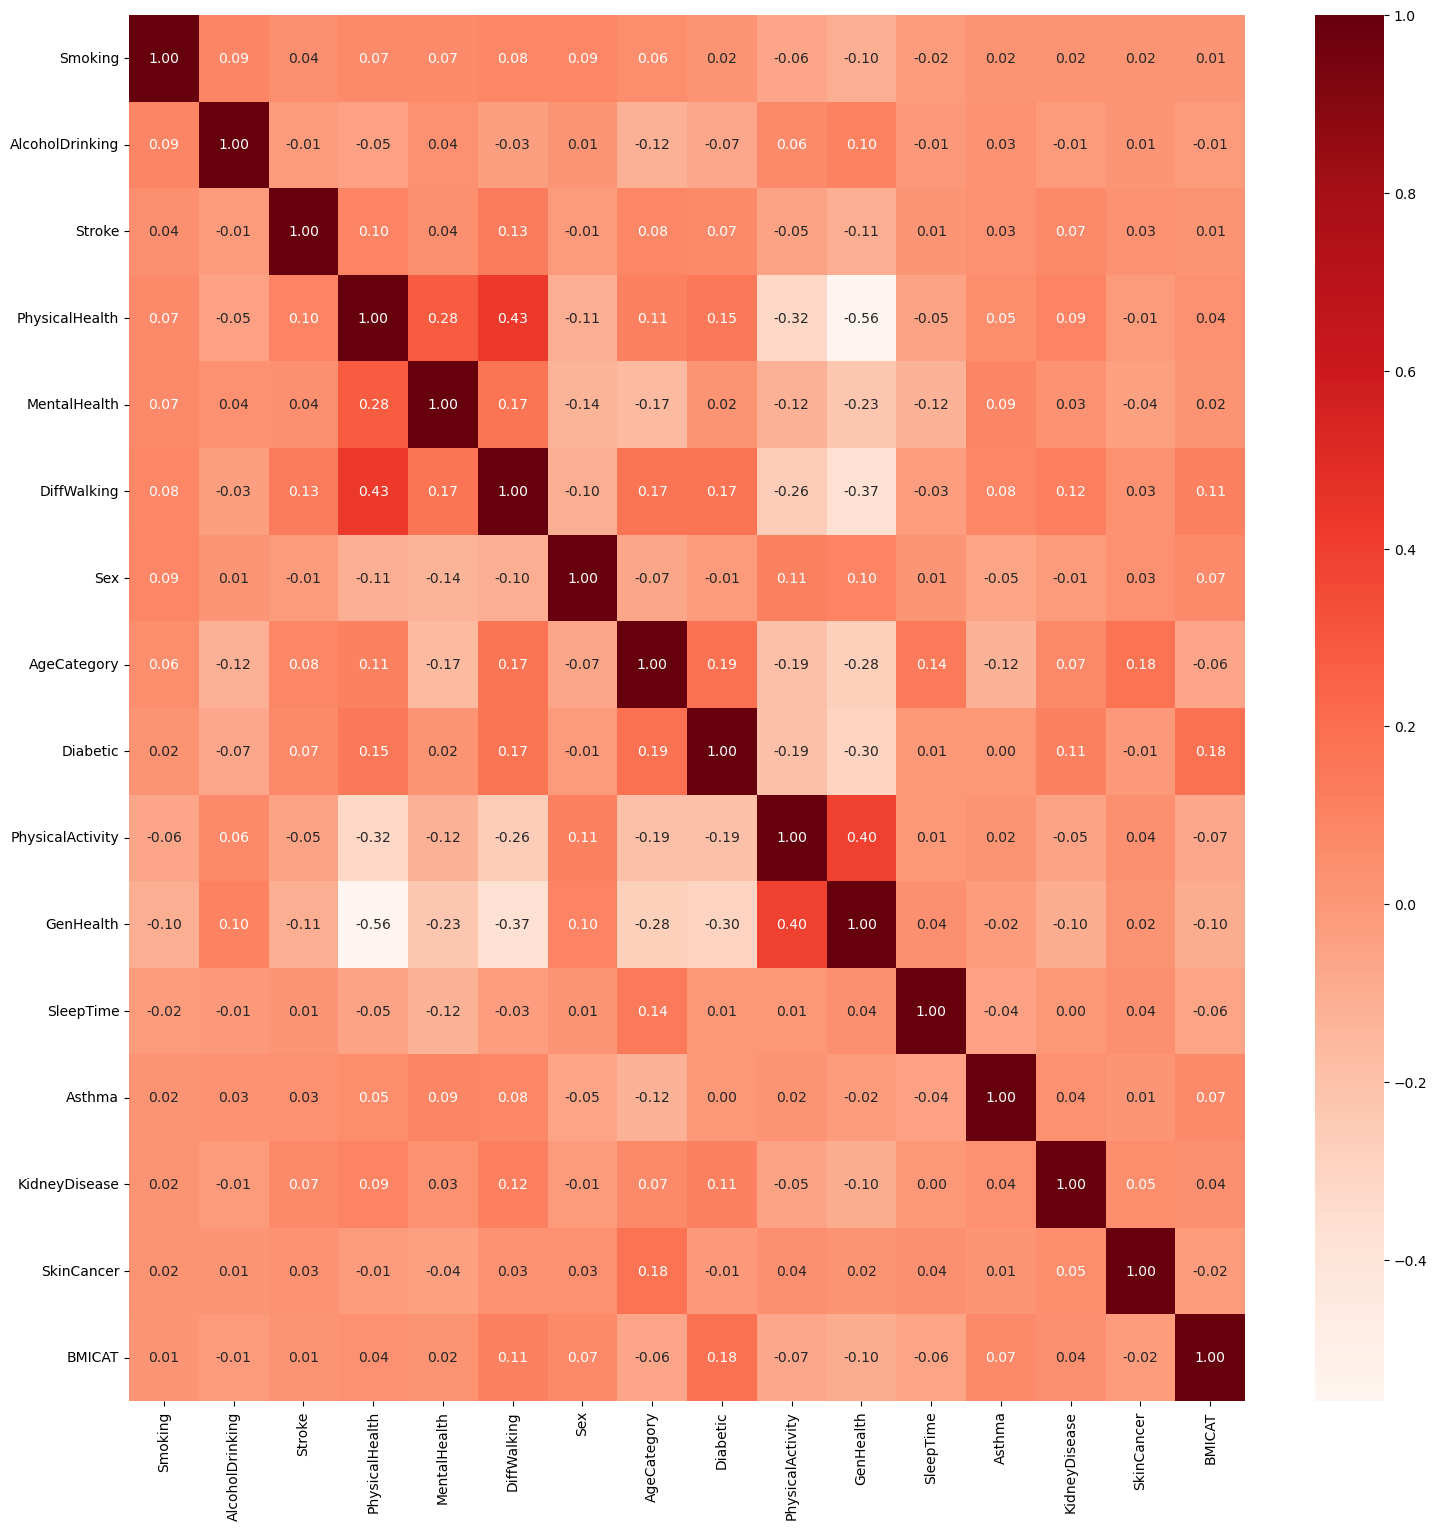

In [100]:
plt.figure(figsize=(18,18))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

In [66]:
models = {
    "DT":DecisionTreeClassifier(random_state = 101, max_depth=7,max_leaf_nodes=4),
    "Logistic": LogisticRegression(random_state = 42),
    "SGD": SGDClassifier(random_state = 101),
    "RF":RandomForestClassifier(random_state = 42, max_depth=27,max_leaf_nodes=5),    
}

results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score','Accuracy'])
def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_title(model)
        metrics.plot_confusion_matrix(fit, X_test, y_test, cmap='Blues', normalize='true', ax=ax)
        plt.show()
        print("-----------------------------------------------------------------------------")
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        accuracy=round(accuracy_score(y_test,fit.predict(X_test))*100,2)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1,accuracy]

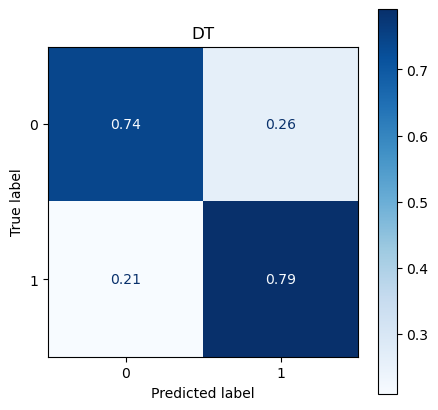

-----------------------------------------------------------------------------


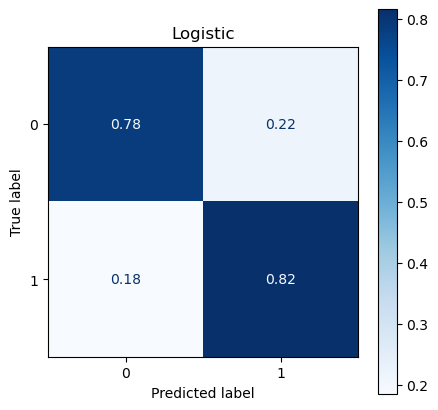

-----------------------------------------------------------------------------


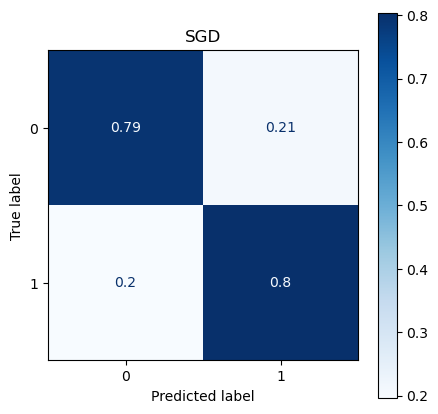

-----------------------------------------------------------------------------


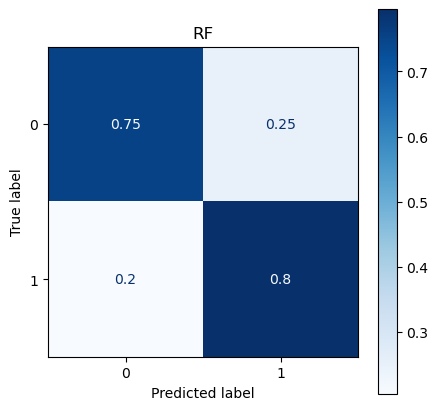

-----------------------------------------------------------------------------


In [67]:
test_models(X_train, X_test, y_train, y_test)

### Model Comparison

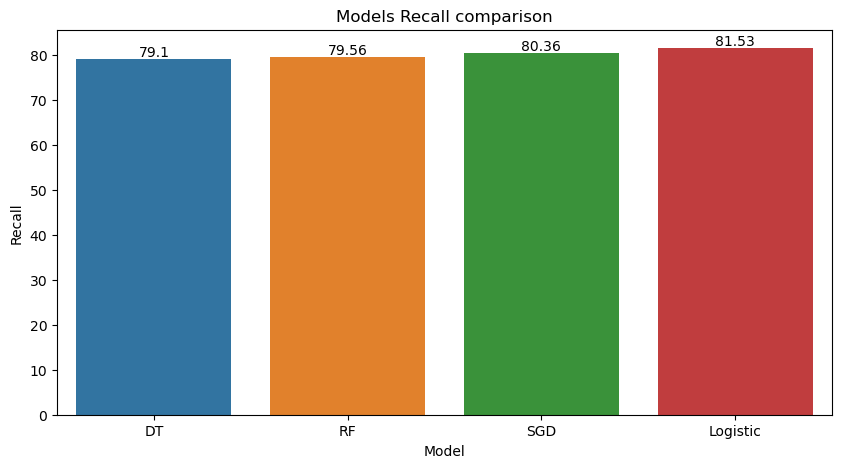

In [69]:
plt.figure(figsize=(10, 5))
 

ax = sns.barplot(x='Model', y="Recall", data=results,order=results.sort_values("Recall").Model)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Models Recall comparison')
plt.show()

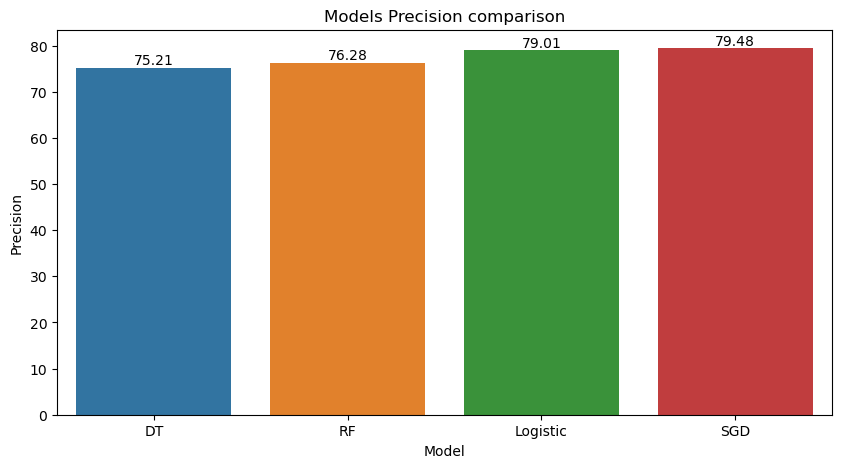

In [114]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y="Precision", data=results,order=results.sort_values("Precision").Model)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Models Precision comparison')
plt.show()

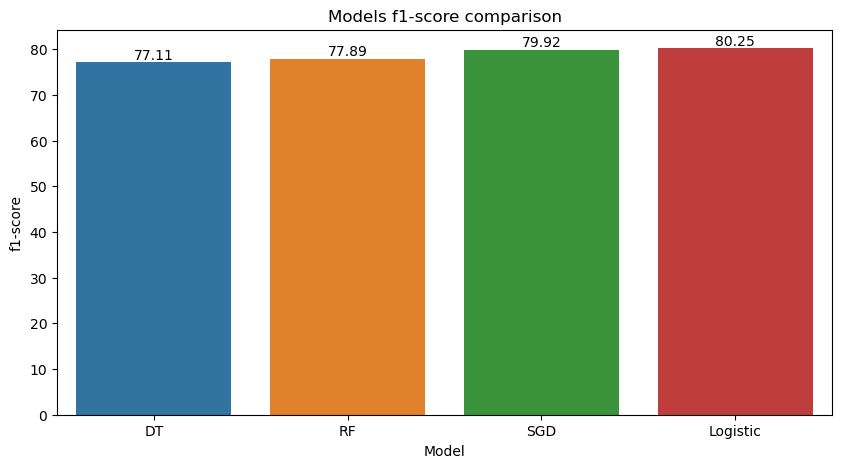

In [113]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y="f1-score", data=results,order=results.sort_values("f1-score").Model)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Models f1-score comparison')
plt.show()

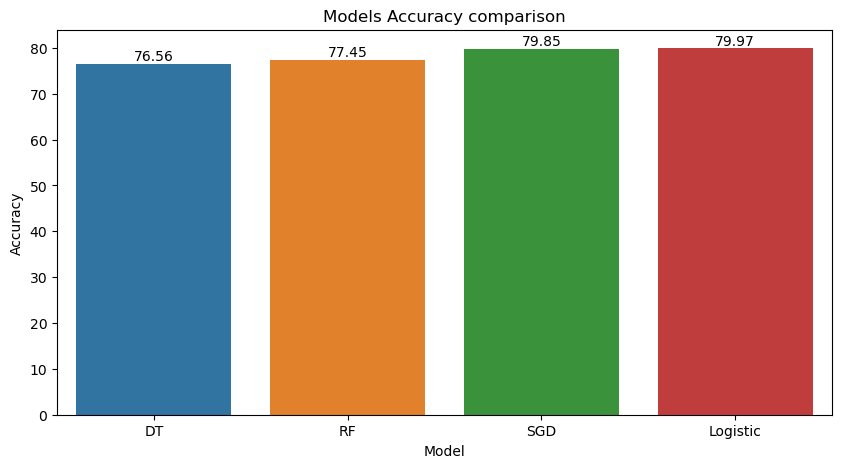

In [99]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y="Accuracy", data=results,order=results.sort_values("Accuracy").Model)
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_title('Models Accuracy comparison')
plt.show()

In [72]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [73]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [74]:
pd.DataFrame(zip(y_train, y_pred_train), columns=['Actual','Predicted'])

,Actual,Predicted
0,1,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
448145,1,0
448146,0,1
448147,0,1
448148,1,1


In [75]:
accuracy_score(y_train, y_pred_train)

0.801628918888765

In [76]:
accuracy_score(y_test, y_pred_test)

0.799719737946054

In [77]:
confusion_matrix(y_test, y_pred_test)

array([[44013, 12112],
       [10327, 45586]], dtype=int64)

### ROC Curve For Logistic Regression

0.7997491679027117


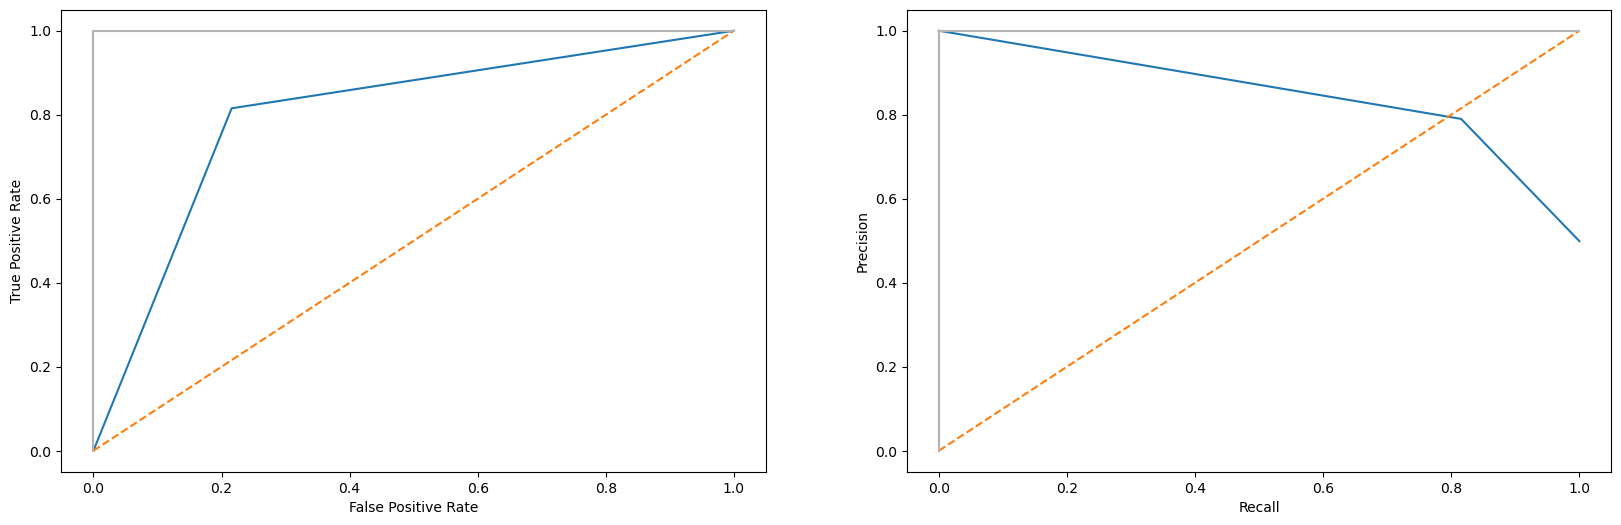

In [78]:
fpr_log,tpr_log,thres_log = roc_curve(y_test, y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(y_test, y_pred_test))


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
plt.show()

In [79]:
print(roc_auc_score(y_test, y_pred_test))

0.7997491679027117


In [88]:
y_pred_test = logreg.predict_proba(X_test)[:,1]

In [89]:
pred_val = np.where(logreg.predict_proba(X_test)[:,1] > 0.50, 1, 0)

In [90]:
cutoff_df = pd.DataFrame(zip(y_test, y_pred_test, pred_val), columns=['Actual','Predicted_Prob', 'Predicted'])
cutoff_df

,Actual,Predicted_Prob,Predicted
0,1,0.868377,1
1,0,0.024335,0
2,0,0.316716,0
3,0,0.385476,0
4,0,0.460048,0
...,...,...,...
112033,1,0.638281,1
112034,1,0.245775,0
112035,0,0.143975,0
112036,0,0.672059,1


In [91]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    cutoff_df[i]= cutoff_df.Predicted_Prob.map(lambda x: 1 if x > i else 0)
cutoff_df.head()

,Actual,Predicted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.868377,1,1,1,1,1,1,1,1,1,1,0
1,0,0.024335,0,1,0,0,0,0,0,0,0,0,0
2,0,0.316716,0,1,1,1,1,0,0,0,0,0,0
3,0,0.385476,0,1,1,1,1,0,0,0,0,0,0
4,0,0.460048,0,1,1,1,1,1,0,0,0,0,0


In [97]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df1 = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
for i in num:
    cm1 = confusion_matrix(cutoff_df.Actual, cutoff_df[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df1.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

In [98]:
cutoff_df1

,prob,accuracy,sensi,speci
0.0,0.0,0.499054,1.000000,0.000000
0.1,0.1,0.667782,0.986175,0.350592
0.2,0.2,0.738687,0.961065,0.517149
0.3,0.3,0.776942,0.924955,0.629488
0.4,0.4,0.796382,0.878311,0.714762
0.5,0.5,0.799720,0.815302,0.784196
0.6,0.6,0.789027,0.733944,0.843902
0.7,0.7,0.762054,0.628351,0.895252
0.8,0.8,0.709679,0.479101,0.939385
0.9,0.9,0.623244,0.267362,0.977782


### ROC Curve For Decision Tree Classifier

In [115]:
DT = DecisionTreeClassifier(random_state = 101, max_depth=7,max_leaf_nodes=4)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=4, random_state=101)

In [117]:
y_pred_train = DT.predict(X_train)
y_pred_test = DT.predict(X_test)

0.7656542993117251


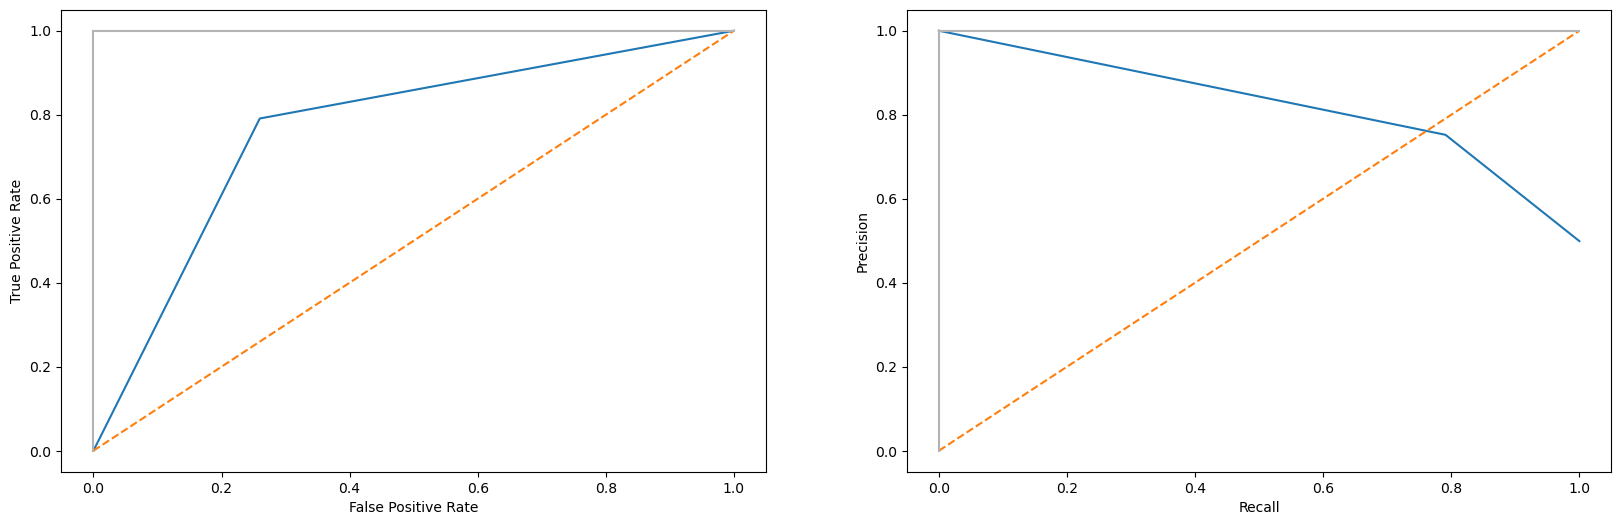

In [120]:
fpr_log,tpr_log,thres_log = roc_curve(y_test, y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(y_test, y_pred_test))


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
plt.show()

### ROC Curve For SGD Classifier

In [121]:
SGD = SGDClassifier(random_state = 101)
SGD.fit(X_train, y_train)

SGDClassifier(random_state=101)

In [122]:
y_pred_train = SGD.predict(X_train)
y_pred_test = SGD.predict(X_test)

0.7984799284698463


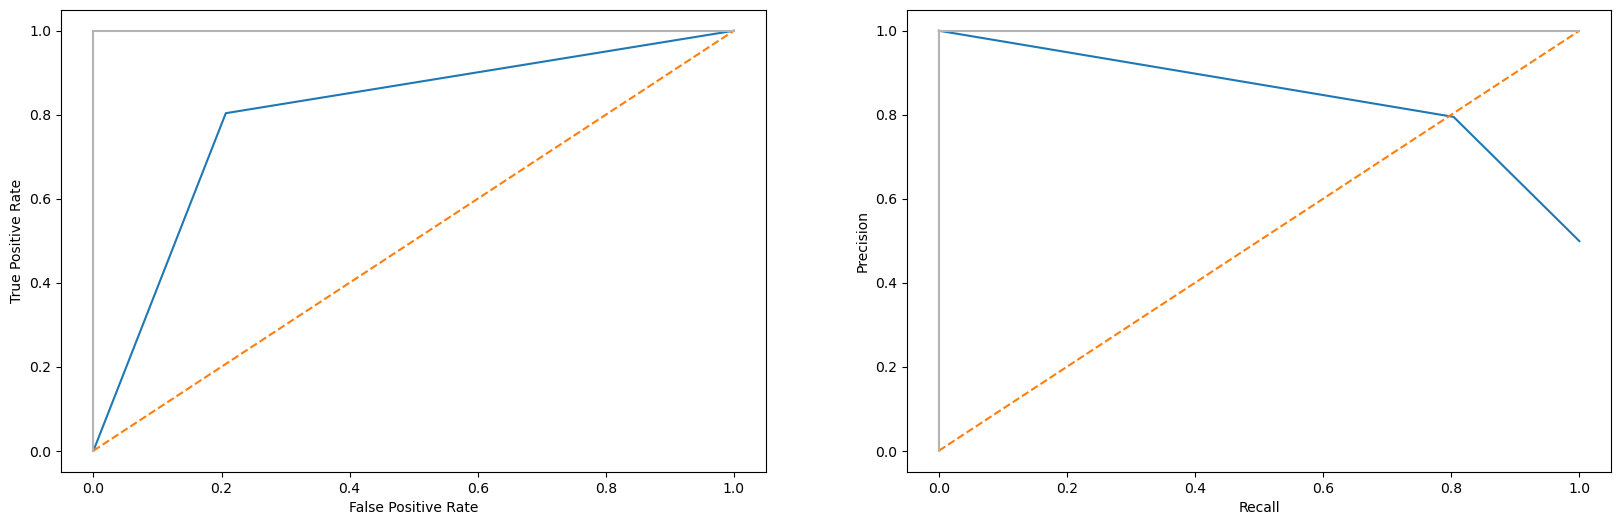

In [123]:
fpr_log,tpr_log,thres_log = roc_curve(y_test, y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(y_test, y_pred_test))


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
plt.show()

### ROC Curve For Random Forest Classifier

In [124]:
RF = RandomForestClassifier(random_state = 42, max_depth=27,max_leaf_nodes=5)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=27, max_leaf_nodes=5, random_state=42)

In [125]:
y_pred_train = RF.predict(X_train)
y_pred_test = RF.predict(X_test)

0.7745806087463991


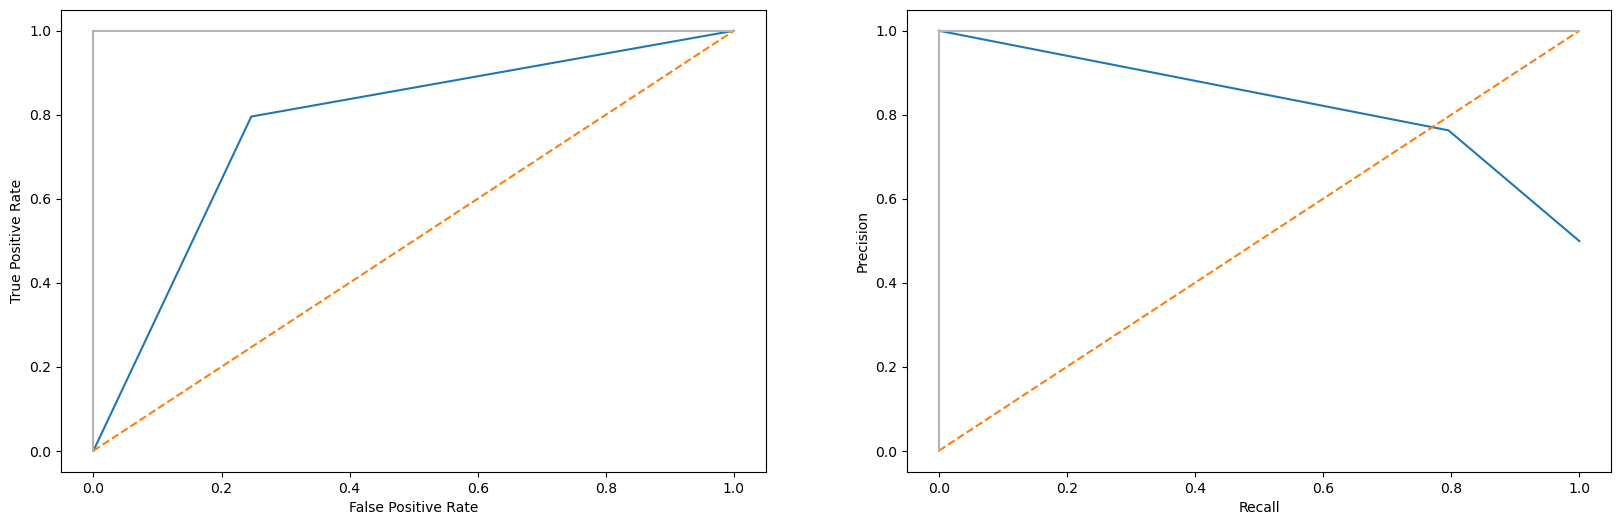

In [126]:
fpr_log,tpr_log,thres_log = roc_curve(y_test, y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
print(roc_auc_score(y_test, y_pred_test))


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')
plt.show()

#### Saving Model

In [43]:
import pickle

filename = '4may.sav'
pickle.dump(logreg, open(filename, 'wb'))